#Estudo Dirigido 2

##Carregando imagem da internet

Saving Destaque-Monte-Fuji.jpg to Destaque-Monte-Fuji (3).jpg


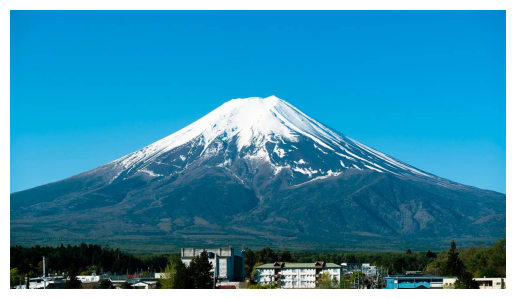

In [5]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

uploaded = files.upload()

imagem = Image.open(list(uploaded.keys())[0])

plt.imshow(imagem)
plt.axis('off')  # Desativa os eixos
plt.show()


##1. Redimensionamento e Cropping


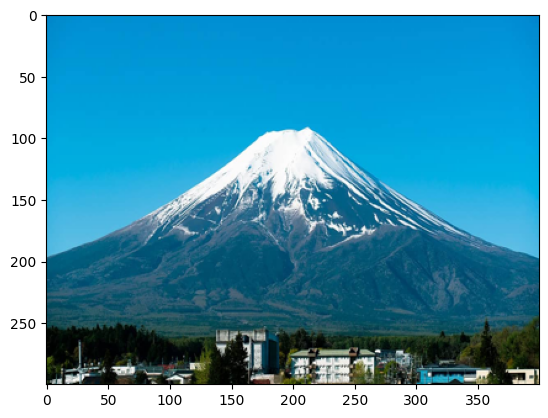

In [11]:
# Redimensionar a imagem
imagem_redimensionada = imagem.resize((400, 300))
plt.imshow(imagem_redimensionada)

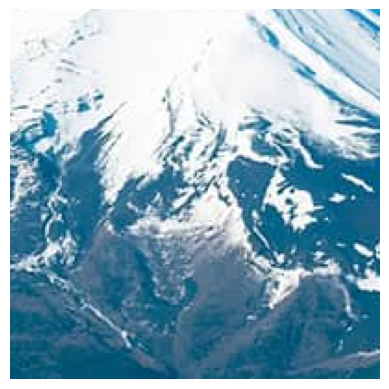

In [6]:
# Fazer o recorte central
largura, altura = imagem.size
esquerda = (largura - 200) / 2
topo = (altura - 200) / 2
direita = (largura + 200) / 2
base = (altura + 200) / 2
imagem_recortada = imagem.crop((esquerda, topo, direita, base))

# Exibir o recorte
plt.imshow(imagem_recortada)
plt.axis('off')
plt.show()


##3. Conversão para Escala de Cinza e Filtro Sepia


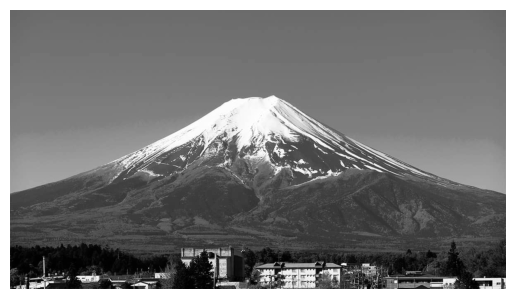

In [12]:
# Converter para escala de cinza
imagem_cinza = imagem.convert('L')
plt.imshow(imagem_cinza, cmap='gray')
plt.axis('off')
plt.show()

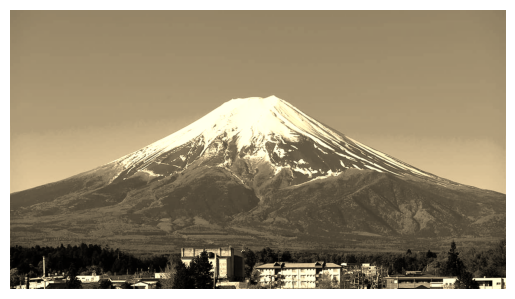

In [13]:
# Aplicar o filtro Sepia
def aplicar_filtro_sepia(imagem):
    largura, altura = imagem.size
    pixels = imagem.load()

    for px in range(largura):
        for py in range(altura):
            r, g, b = imagem.getpixel((px, py))

            tr = int(0.393 * r + 0.769 * g + 0.189 * b)
            tg = int(0.349 * r + 0.686 * g + 0.168 * b)
            tb = int(0.272 * r + 0.534 * g + 0.131 * b)

            tr = min(255, tr)
            tg = min(255, tg)
            tb = min(255, tb)

            pixels[px, py] = (tr, tg, tb)

    return imagem

imagem_sepia = aplicar_filtro_sepia(imagem.copy())
plt.imshow(imagem_sepia)
plt.axis('off')
plt.show()

##4. Imagem Vetorial com Animação (SVG)


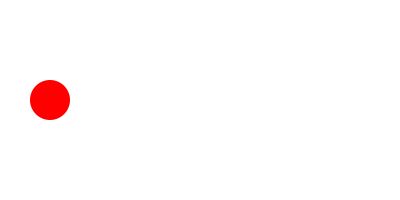

In [20]:
"""
Circulo com uma coloração Marble Fade

svg_code = '''
<svg width="400" height="200" xmlns="http://www.w3.org/2000/svg">
  <defs>
    <linearGradient id="marbleFade">
      <stop offset="0%" stop-color="blue">
        <animate attributeName="stop-color" values="blue;red;green;blue" dur="4s" repeatCount="indefinite" />
      </stop>
      <stop offset="100%" stop-color="purple">
        <animate attributeName="stop-color" values="purple;yellow;orange;purple" dur="4s" repeatCount="indefinite" />
      </stop>
    </linearGradient>
  </defs>
  <circle cx="50" cy="100" r="20" fill="url(#marbleFade)">
    <animate attributeName="cx" values="50;350;50" dur="4s" repeatCount="indefinite" />
    <animate attributeName="opacity" values="0;1;0" dur="4s" repeatCount="indefinite" />
  </circle>
</svg>
'''
"""

svg_code = '''
<svg width="400" height="200" xmlns="http://www.w3.org/2000/svg">
    <circle cx="50" cy="100" r="20" fill="red">
        <animate attributeName="cx" values="50;350;50" dur="6s" repeatCount="indefinite" />

    </circle>
</svg>
'''

# Salvando o SVG
with open('animacao_circulo.svg', 'w') as f:
    f.write(svg_code)

# Mostrar SVG no Colab
from IPython.display import SVG, display
display(SVG(svg_code))
